In [26]:
import json

with open("latest_history.json", "r") as fp:
    data = json.load(fp)

In [27]:
data = data[int(-60 * 60 * 14.5):int(-60 * 60 * 13)]

In [ ]:
# Get rough value for empty bed weight per leg
rough_bed_weight = 80
bed_only_weight = {}
for d in data:
    if d["total"] < rough_bed_weight:
        bed_only_weight = {
            "tl": d["tl"],
            "tr": d["tr"],
            "bl": d["bl"],
            "br": d["br"],
        }
        total_bed_only_weight = sum(bed_only_weight.values())
        break

print(f"Total bed weight: {total_bed_only_weight}")

Total bed weight: 78.98908


In [28]:
y = [d["total"] - total_bed_only_weight for d in data]
y = [(i if i > 10 else None) for i in y]

x = [i for i in range(len(y))]

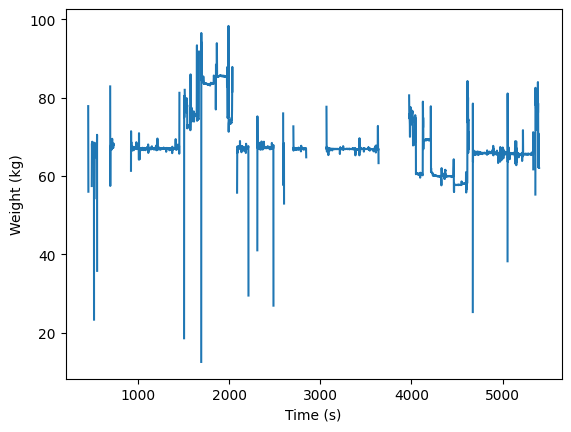

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel("Time (s)")
ax.set_ylabel("Weight (kg)")

ax.plot(x, y, color="tab:blue")

plt.show()